<a href="https://colab.research.google.com/github/gus-s-ramos/AlgoritmoAtividadeFinal/blob/main/pratica/ae_atv_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introdução – Seleção em Algoritmos Evolutivos

Nos **Algoritmos Evolutivos (AEs)**, a população é composta por várias soluções candidatas para um problema. Cada indivíduo recebe uma nota chamada **fitness**, que indica o quão boa é essa solução.

O próximo passo é **selecionar indivíduos** que servirão de base para criar a nova geração (via cruzamento e mutação).
Essa etapa é crucial: se sempre escolhermos apenas os melhores, podemos perder diversidade. Se escolhermos totalmente ao acaso, o algoritmo demora para convergir.

Por isso, existem métodos de seleção que **equilibram exploração e intensificação**. Dois dos mais usados são:

---

## Seleção por Roleta

* Imagine uma roleta de cassino em que cada indivíduo ocupa uma fatia proporcional ao seu fitness.
* Quanto maior o fitness, maior a fatia → maior a probabilidade de ser escolhido.
* Indivíduos fracos ainda têm chance, mas pequena.

Vantagem: respeita proporcionalidade.
Limitação: pode ser influenciada demais por diferenças grandes de escala.

---

##  Seleção por Torneio

* Escolhem-se **k indivíduos aleatoriamente** e comparam-se seus fitness.
* O vencedor do torneio é o que tem maior fitness.
* Ajustando o tamanho `k`, controlamos a pressão seletiva:

  * `k` pequeno → mais diversidade.
  * `k` grande → maior probabilidade de escolher sempre os melhores.

 Vantagem: simples de implementar e ajustar.
 Limitação: precisa escolher bem `k` para não perder diversidade.



# Seleção por Roleta

In [ ]:
import random

# Função de fitness (mesmo exemplo)
def fitness(x):
    return -(x - 3)**2 + 9

# População de exemplo
populacao = [random.uniform(-10, 10) for _ in range(10)]
fitness_vals = [fitness(ind) for ind in populacao]

def selecao_roleta(populacao, fitness_vals):
    soma_fit = sum(fitness_vals)
    pick = random.uniform(0, soma_fit)
    atual = 0
    for ind, fit in zip(populacao, fitness_vals):
        atual += fit
        if atual >= pick:
            return ind

# Exemplo de seleção
print("População inicial:")
for ind, fit in zip(populacao, fitness_vals):
    print(f"Indivíduo: {ind:.4f} -> Fitness: {fit:.4f}")

print("\nIndivíduo selecionado (roleta):", selecao_roleta(populacao, fitness_vals))


População inicial:
Indivíduo: 0.7470 -> Fitness: 3.9242
Indivíduo: 0.3497 -> Fitness: 1.9758
Indivíduo: -1.1740 -> Fitness: -8.4226
Indivíduo: 2.0156 -> Fitness: 8.0309
Indivíduo: 2.3206 -> Fitness: 8.5384
Indivíduo: -3.6729 -> Fitness: -35.5279
Indivíduo: 5.2835 -> Fitness: 3.7859
Indivíduo: 3.0923 -> Fitness: 8.9915
Indivíduo: 1.9373 -> Fitness: 7.8707
Indivíduo: -2.7352 -> Fitness: -23.8922

Indivíduo selecionado (roleta): 0.7470476535212196


# Seleção por Torneio



In [ ]:
import random

# Função de fitness
def fitness(x):
    return -(x - 3)**2 + 9

# População de exemplo
populacao = [random.uniform(-10, 10) for _ in range(10)]
fitness_vals = [fitness(ind) for ind in populacao]

def selecao_torneio(populacao, fitness_vals, k=3):
    participantes = random.sample(list(zip(populacao, fitness_vals)), k)
    vencedor = max(participantes, key=lambda x: x[1])
    return vencedor[0]

# Exemplo de seleção
print("População inicial:")
for ind, fit in zip(populacao, fitness_vals):
    print(f"Indivíduo: {ind:.4f} -> Fitness: {fit:.4f}")

print("\nIndivíduo selecionado (torneio):", selecao_torneio(populacao, fitness_vals, k=3))

População inicial:
Indivíduo: 9.0945 -> Fitness: -28.1429
Indivíduo: -7.8135 -> Fitness: -107.9322
Indivíduo: -8.0914 -> Fitness: -114.0181
Indivíduo: 5.2895 -> Fitness: 3.7581
Indivíduo: -3.4740 -> Fitness: -32.9125
Indivíduo: 3.0828 -> Fitness: 8.9931
Indivíduo: -6.0632 -> Fitness: -73.1413
Indivíduo: -4.1902 -> Fitness: -42.6992
Indivíduo: -2.1890 -> Fitness: -17.9253
Indivíduo: 2.3534 -> Fitness: 8.5819

Indivíduo selecionado (torneio): 9.094499802742071


# Exercícios

## Parte 1 - Roleta

1. Rode a seleção 10 vezes seguidas e veja se os indivíduos com maior fitness aparecem mais frequentemente.

1. Modifique a função de fitness para f(x) = x**2 e compare a seleção por roleta.

1.  Implemente uma função que selecione 2 indivíduos por roleta e os retorne em uma lista.

1. Teste com uma população muito desbalanceada (ex.: fitness de alguns = 0.1, outros = 100). O que acontece?

1. Plote um gráfico de barras mostrando a frequência de seleção de cada indivíduo após 1.000 seleções.


## Parte 2 - Torneio

6. Rode a seleção 10 vezes com k=2 e depois com k=5.
→ O que muda no indivíduo selecionado?

6. Altere a função de fitness para f(x) = -abs(x-2) e veja o impacto nos vencedores do torneio.

6. Implemente uma versão que retorna 2 vencedores de torneio em vez de apenas um.

6. Teste populações grandes (50 ou 100 indivíduos) e compare os resultados da seleção.

6. Simule 1.000 torneios e plote um gráfico mostrando quais indivíduos foram selecionados mais vezes.

## Exercício 1


In [1]:
import random

def fitness(x):
    return -(x - 3)**2 + 9

populacao = [random.uniform(-10, 10) for _ in range(10)]
fitness_vals = [fitness(ind) for ind in populacao]

def selecao_roleta(populacao, fitness_vals):
    soma_fit = sum(fitness_vals)
    if soma_fit <= 0:
        return random.choice(populacao)

    pick = random.uniform(0, soma_fit)
    atual = 0
    for ind, fit in zip(populacao, fitness_vals):
        atual += fit
        if atual >= pick:
            return ind
    return random.choice(populacao)


print("População inicial:")
for ind, fit in zip(populacao, fitness_vals):
    print(f"Indivíduo: {ind:.4f} -> Fitness: {fit:.4f}")

print("\nRealizando 10 seleções por roleta:")
selecoes = []
for i in range(10):
    selecionado = selecao_roleta(populacao, fitness_vals)
    selecoes.append(selecionado)
    print(f"Seleção {i+1}: {selecionado:.4f}")



População inicial:
Indivíduo: 6.3494 -> Fitness: -2.2186
Indivíduo: -4.4711 -> Fitness: -46.8173
Indivíduo: -9.2859 -> Fitness: -141.9435
Indivíduo: 0.0333 -> Fitness: 0.1986
Indivíduo: 9.2880 -> Fitness: -30.5384
Indivíduo: -0.6640 -> Fitness: -4.4250
Indivíduo: -4.7261 -> Fitness: -50.6934
Indivíduo: 9.7122 -> Fitness: -36.0532
Indivíduo: -0.3859 -> Fitness: -2.4645
Indivíduo: 5.9543 -> Fitness: 0.2721

Realizando 10 seleções por roleta:
Seleção 1: 5.9543
Seleção 2: 5.9543
Seleção 3: -4.4711
Seleção 4: 9.2880
Seleção 5: 9.2880
Seleção 6: 0.0333
Seleção 7: -4.4711
Seleção 8: -4.4711
Seleção 9: 9.2880
Seleção 10: 5.9543


In [2]:
def fitness(x):
    return x**2

populacao = [random.uniform(-10, 10) for _ in range(10)]
fitness_vals = [fitness(ind) for ind in populacao]

print("\nPopulação inicial com fitness = x^2:")
for ind, fit in zip(populacao, fitness_vals):
    print(f"Indivíduo: {ind:.4f} -> Fitness: {fit:.4f}")

print("\nRealizando 10 seleções por roleta com fitness = x^2:")
selecoes = []
for i in range(10):
    selecionado = selecao_roleta(populacao, fitness_vals)
    selecoes.append(selecionado)
    print(f"Seleção {i+1}: {selecionado:.4f}")




População inicial com fitness = x^2:
Indivíduo: -5.4791 -> Fitness: 30.0210
Indivíduo: -4.0149 -> Fitness: 16.1192
Indivíduo: -4.0536 -> Fitness: 16.4317
Indivíduo: 5.7267 -> Fitness: 32.7953
Indivíduo: -4.7188 -> Fitness: 22.2674
Indivíduo: -9.9969 -> Fitness: 99.9382
Indivíduo: 7.8275 -> Fitness: 61.2699
Indivíduo: -5.1796 -> Fitness: 26.8287
Indivíduo: -2.2538 -> Fitness: 5.0795
Indivíduo: -9.2658 -> Fitness: 85.8544

Realizando 10 seleções por roleta com fitness = x^2:
Seleção 1: 7.8275
Seleção 2: -9.2658
Seleção 3: -9.9969
Seleção 4: -9.9969
Seleção 5: 7.8275
Seleção 6: -9.2658
Seleção 7: -9.9969
Seleção 8: 5.7267
Seleção 9: -9.9969
Seleção 10: 5.7267


In [3]:
def selecao_roleta_dois(populacao, fitness_vals):
    ind1 = selecao_roleta(populacao, fitness_vals)
    ind2 = selecao_roleta(populacao, fitness_vals)
    return [ind1, ind2]

print("\nSelecionando 2 indivíduos por roleta:")
selecionados_duplos = selecao_roleta_dois(populacao, fitness_vals)
print(f"Indivíduos selecionados: {selecionados_duplos[0]:.4f}, {selecionados_duplos[1]:.4f}")


Selecionando 2 indivíduos por roleta:
Indivíduos selecionados: -9.9969, -5.4791


In [4]:
populacao_desbalanceada = [f"ind_{i}" for i in range(10)]
fitness_vals_desbalanceada = [0.1] * 8 + [100.0] * 2 # 8 individuals with low fitness, 2 with high fitness

print("\nTestando com população desbalanceada (8x fitness baixo, 2x fitness alto):")
for ind, fit in zip(populacao_desbalanceada, fitness_vals_desbalanceada):
    print(f"Indivíduo: {ind} -> Fitness: {fit:.4f}")

print("\nRealizando 10 seleções por roleta com população desbalanceada:")
selecoes_desbalanceadas = []
for i in range(10):
    selecionado = selecao_roleta(populacao_desbalanceada, fitness_vals_desbalanceada)
    selecoes_desbalanceadas.append(selecionado)
    print(f"Seleção {i+1}: {selecionado}")



Testando com população desbalanceada (8x fitness baixo, 2x fitness alto):
Indivíduo: ind_0 -> Fitness: 0.1000
Indivíduo: ind_1 -> Fitness: 0.1000
Indivíduo: ind_2 -> Fitness: 0.1000
Indivíduo: ind_3 -> Fitness: 0.1000
Indivíduo: ind_4 -> Fitness: 0.1000
Indivíduo: ind_5 -> Fitness: 0.1000
Indivíduo: ind_6 -> Fitness: 0.1000
Indivíduo: ind_7 -> Fitness: 0.1000
Indivíduo: ind_8 -> Fitness: 100.0000
Indivíduo: ind_9 -> Fitness: 100.0000

Realizando 10 seleções por roleta com população desbalanceada:
Seleção 1: ind_9
Seleção 2: ind_8
Seleção 3: ind_8
Seleção 4: ind_9
Seleção 5: ind_8
Seleção 6: ind_8
Seleção 7: ind_9
Seleção 8: ind_8
Seleção 9: ind_8
Seleção 10: ind_8



Generating data for frequency plot (1000 selections):


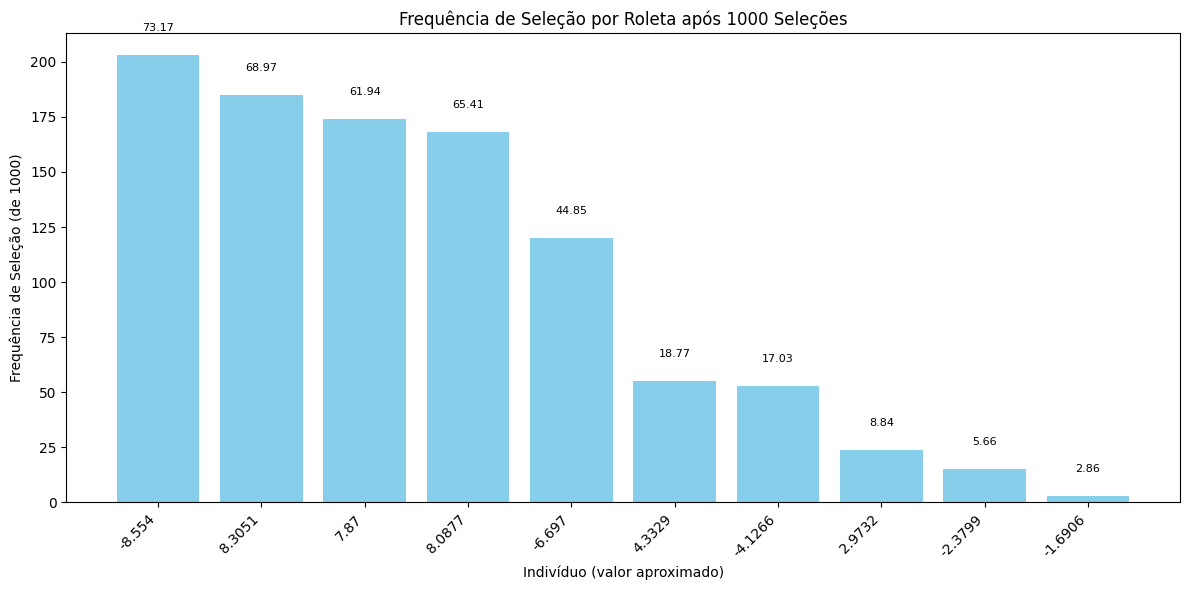

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

populacao = [random.uniform(-10, 10) for _ in range(10)]
fitness_vals = [fitness(ind) for ind in populacao] # Using the f(x) = x^2 fitness from previous steps

print("\nGenerating data for frequency plot (1000 selections):")
selecoes_mil = []
for _ in range(1000):
    selecionado = selecao_roleta(populacao, fitness_vals)
    selecoes_mil.append(selecionado)

selecoes_mil_rounded = [round(ind, 4) for ind in selecoes_mil]
frequencia_selecao = Counter(selecoes_mil_rounded)

individuos_plot = list(frequencia_selecao.keys())
frequencias_plot = list(frequencia_selecao.values())

sorted_indices = sorted(range(len(frequencias_plot)), key=lambda k: frequencias_plot[k], reverse=True)
individuos_plot_sorted = [individuos_plot[i] for i in sorted_indices]
frequencias_plot_sorted = [frequencias_plot[i] for i in sorted_indices]

fitness_map_rounded = {round(ind, 4): fit for ind, fit in zip(populacao, fitness_vals)}
fitness_labels = [f"{fitness_map_rounded.get(ind, 'N/A'):.2f}" for ind in individuos_plot_sorted]


plt.figure(figsize=(12, 6))
bars = plt.bar([str(ind) for ind in individuos_plot_sorted], frequencias_plot_sorted, color='skyblue')
plt.xlabel("Indivíduo (valor aproximado)")
plt.ylabel("Frequência de Seleção (de 1000)")
plt.title("Frequência de Seleção por Roleta após 1000 Seleções")
plt.xticks(rotation=45, ha='right') # Rotate labels for readability

for bar, fitness_val in zip(bars, fitness_labels):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, fitness_val, ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.show()



In [7]:
import random

def fitness(x):
    return -(x - 3)**2 + 9

populacao = [random.uniform(-10, 10) for _ in range(10)]
fitness_vals = [fitness(ind) for ind in populacao]

def selecao_torneio(populacao, fitness_vals, k=3):
    # Create a list of tuples (individual, fitness)
    pop_with_fitness = list(zip(populacao, fitness_vals))
    participantes = random.sample(pop_with_fitness, k)
    vencedor = max(participantes, key=lambda x: x[1])
    return vencedor[0]

print("População inicial (para Torneio):")
for ind, fit in zip(populacao, fitness_vals):
    print(f"Indivíduo: {ind:.4f} -> Fitness: {fit:.4f}")

print("\nRealizando 10 seleções por torneio com k=2:")
selecoes_k2 = []
for i in range(10):
    selecionado = selecao_torneio(populacao, fitness_vals, k=2)
    selecoes_k2.append(selecionado)
    print(f"Seleção {i+1} (k=2): {selecionado:.4f}")

print("\nRealizando 10 seleções por torneio com k=5:")
selecoes_k5 = []
for i in range(10):
    selecionado = selecao_torneio(populacao, fitness_vals, k=5)
    selecoes_k5.append(selecionado)
    print(f"Seleção {i+1} (k=5): {selecionado:.4f}")


População inicial (para Torneio):
Indivíduo: 7.1251 -> Fitness: -8.0168
Indivíduo: -8.4458 -> Fitness: -122.0063
Indivíduo: 4.6774 -> Fitness: 6.1865
Indivíduo: -4.3196 -> Fitness: -44.5767
Indivíduo: -5.9817 -> Fitness: -71.6708
Indivíduo: -2.6917 -> Fitness: -23.3955
Indivíduo: -7.6269 -> Fitness: -103.9300
Indivíduo: 7.7397 -> Fitness: -13.4649
Indivíduo: 0.2789 -> Fitness: 1.5958
Indivíduo: -0.3482 -> Fitness: -2.2106

Realizando 10 seleções por torneio com k=2:
Seleção 1 (k=2): 7.1251
Seleção 2 (k=2): -5.9817
Seleção 3 (k=2): 0.2789
Seleção 4 (k=2): 4.6774
Seleção 5 (k=2): 7.7397
Seleção 6 (k=2): -0.3482
Seleção 7 (k=2): -0.3482
Seleção 8 (k=2): 7.7397
Seleção 9 (k=2): 0.2789
Seleção 10 (k=2): 4.6774

Realizando 10 seleções por torneio com k=5:
Seleção 1 (k=5): 4.6774
Seleção 2 (k=5): 0.2789
Seleção 3 (k=5): 0.2789
Seleção 4 (k=5): 4.6774
Seleção 5 (k=5): -0.3482
Seleção 6 (k=5): 0.2789
Seleção 7 (k=5): 4.6774
Seleção 8 (k=5): 4.6774
Seleção 9 (k=5): -0.3482
Seleção 10 (k=5): 0.27

In [8]:
def fitness(x):
    return -abs(x - 2)

populacao = [random.uniform(-10, 10) for _ in range(10)]
fitness_vals = [fitness(ind) for ind in populacao]

print("\nPopulação inicial com fitness = -abs(x-2):")
for ind, fit in zip(populacao, fitness_vals):
    print(f"Indivíduo: {ind:.4f} -> Fitness: {fit:.4f}")

print("\nRealizando 10 seleções por torneio com k=2 (fitness = -abs(x-2)):")
selecoes_k2_new_fitness = []
for i in range(10):
    selecionado = selecao_torneio(populacao, fitness_vals, k=2)
    selecoes_k2_new_fitness.append(selecionado)
    print(f"Seleção {i+1} (k=2): {selecionado:.4f}")

print("\nRealizando 10 seleções por torneio com k=5 (fitness = -abs(x-2)):")
selecoes_k5_new_fitness = []
for i in range(10):
    selecionado = selecao_torneio(populacao, fitness_vals, k=5)
    selecoes_k5_new_fitness.append(selecionado)
    print(f"Seleção {i+1} (k=5): {selecionado:.4f}")



População inicial com fitness = -abs(x-2):
Indivíduo: 0.2716 -> Fitness: -1.7284
Indivíduo: 4.8229 -> Fitness: -2.8229
Indivíduo: -2.9149 -> Fitness: -4.9149
Indivíduo: -6.3619 -> Fitness: -8.3619
Indivíduo: -4.9733 -> Fitness: -6.9733
Indivíduo: 3.7814 -> Fitness: -1.7814
Indivíduo: 6.5739 -> Fitness: -4.5739
Indivíduo: -5.6122 -> Fitness: -7.6122
Indivíduo: -9.2303 -> Fitness: -11.2303
Indivíduo: -7.1335 -> Fitness: -9.1335

Realizando 10 seleções por torneio com k=2 (fitness = -abs(x-2)):
Seleção 1 (k=2): 3.7814
Seleção 2 (k=2): 3.7814
Seleção 3 (k=2): -5.6122
Seleção 4 (k=2): -6.3619
Seleção 5 (k=2): 3.7814
Seleção 6 (k=2): -2.9149
Seleção 7 (k=2): 4.8229
Seleção 8 (k=2): 0.2716
Seleção 9 (k=2): 4.8229
Seleção 10 (k=2): -2.9149

Realizando 10 seleções por torneio com k=5 (fitness = -abs(x-2)):
Seleção 1 (k=5): 0.2716
Seleção 2 (k=5): 3.7814
Seleção 3 (k=5): 0.2716
Seleção 4 (k=5): 4.8229
Seleção 5 (k=5): 3.7814
Seleção 6 (k=5): 0.2716
Seleção 7 (k=5): 4.8229
Seleção 8 (k=5): 4.822

## Parte 2




In [9]:
import random

def fitness(x):
    return -abs(x - 2)

populacao = [random.uniform(-10, 10) for _ in range(10)]
fitness_vals = [fitness(ind) for ind in populacao]

def selecao_torneio_duplo(populacao, fitness_vals, k=5):
    pop_with_fitness = list(zip(populacao, fitness_vals))
    k = min(k, len(pop_with_fitness))
    participantes = random.sample(pop_with_fitness, k)

    participantes_ordenados = sorted(participantes, key=lambda x: x[1], reverse=True)

    if len(participantes_ordenados) >= 2:
        return [participantes_ordenados[0][0], participantes_ordenados[1][0]]
    elif len(participantes_ordenados) == 1:
        return [participantes_ordenados[0][0], participantes_ordenados[0][0]] # Return the single participant twice if k=1
    else:
        return [] # Should not happen if k >= 1


print("População inicial (para Torneio Duplo):")
for ind, fit in zip(populacao, fitness_vals):
    print(f"Indivíduo: {ind:.4f} -> Fitness: {fit:.4f}")

k_value = 5 # Chosen value for k
print(f"\nSelecionando 2 indivíduos por torneio com k={k_value} (fitness = -abs(x-2)):")
selecionados_duplos = selecao_torneio_duplo(populacao, fitness_vals, k=k_value)

if selecionados_duplos:
    print(f"Indivíduos selecionados: {selecionados_duplos[0]:.4f}, {selecionados_duplos[1]:.4f}")
else:
    print("Não foi possível selecionar indivíduos.")


População inicial (para Torneio Duplo):
Indivíduo: 0.1105 -> Fitness: -1.8895
Indivíduo: 8.6441 -> Fitness: -6.6441
Indivíduo: -9.7928 -> Fitness: -11.7928
Indivíduo: -6.1734 -> Fitness: -8.1734
Indivíduo: 7.1957 -> Fitness: -5.1957
Indivíduo: -6.7330 -> Fitness: -8.7330
Indivíduo: 4.6460 -> Fitness: -2.6460
Indivíduo: 2.8465 -> Fitness: -0.8465
Indivíduo: 9.0611 -> Fitness: -7.0611
Indivíduo: -0.6292 -> Fitness: -2.6292

Selecionando 2 indivíduos por torneio com k=5 (fitness = -abs(x-2)):
Indivíduos selecionados: 2.8465, 0.1105


In [10]:
populacao_50 = [random.uniform(-10, 10) for _ in range(50)]
fitness_vals_50 = [fitness(ind) for ind in populacao_50]

print("População de 50 indivíduos gerada.")

k_value = 5
selecionado_50 = selecao_torneio(populacao_50, fitness_vals_50, k=k_value)

print(f"\nIndivíduo selecionado por torneio (k={k_value}) da população de 50: {selecionado_50:.4f}")

População de 50 indivíduos gerada.

Indivíduo selecionado por torneio (k=5) da população de 50: 1.4909


In [11]:
populacao_100 = [random.uniform(-10, 10) for _ in range(100)]
fitness_vals_100 = [fitness(ind) for ind in populacao_100]

print("\nPopulação de 100 indivíduos gerada.")

selecionado_100 = selecao_torneio(populacao_100, fitness_vals_100, k=k_value)

print(f"\nIndivíduo selecionado por torneio (k={k_value}) da população de 100: {selecionado_100:.4f}")

print("\nComparação dos indivíduos selecionados:")
print(f"Indivíduo da população de 50: {selecionado_50:.4f} (Fitness: {fitness(selecionado_50):.4f})")
print(f"Indivíduo da população de 100: {selecionado_100:.4f} (Fitness: {fitness(selecionado_100):.4f})")



População de 100 indivíduos gerada.

Indivíduo selecionado por torneio (k=5) da população de 100: 3.0034

Comparação dos indivíduos selecionados:
Indivíduo da população de 50: 1.4909 (Fitness: -0.5091)
Indivíduo da população de 100: 3.0034 (Fitness: -1.0034)


Simulating 1000 tournaments with k=5...


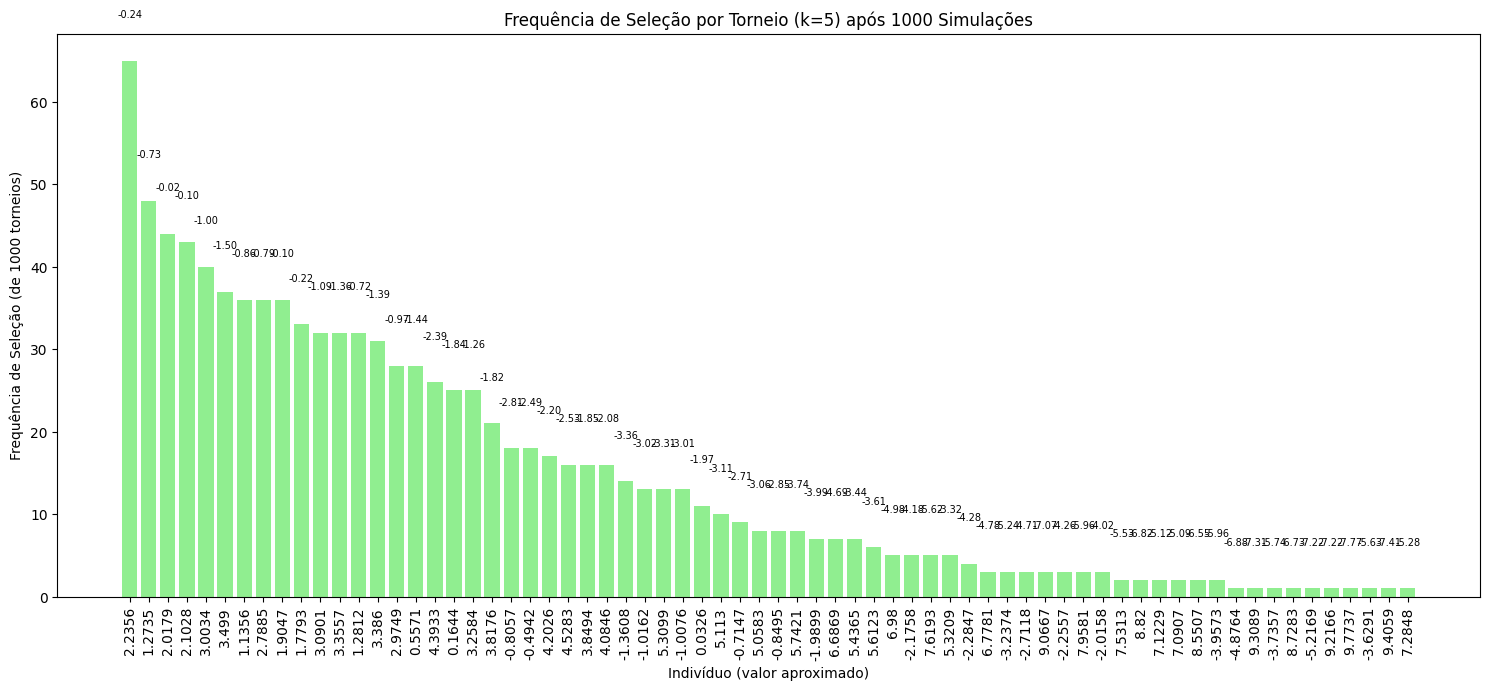

In [12]:
import collections
import matplotlib.pyplot as plt

selecoes_torneio_mil = []

k_value = 5
print(f"Simulating 1000 tournaments with k={k_value}...")
for _ in range(1000):
    selecionado = selecao_torneio(populacao_100, fitness_vals_100, k=k_value)
    selecoes_torneio_mil.append(selecionado)

selecoes_torneio_mil_rounded = [round(ind, 4) for ind in selecoes_torneio_mil]

frequencia_selecao_torneio = collections.Counter(selecoes_torneio_mil_rounded)

individuos_torneio_plot = list(frequencia_selecao_torneio.keys())
frequencias_torneio_plot = list(frequencia_selecao_torneio.values())

sorted_indices_torneio = sorted(range(len(frequencias_torneio_plot)), key=lambda k: frequencias_torneio_plot[k], reverse=True)
individuos_torneio_plot_sorted = [individuos_torneio_plot[i] for i in sorted_indices_torneio]
frequencias_torneio_plot_sorted = [frequencias_torneio_plot[i] for i in sorted_indices_torneio]

fitness_map_original = dict(zip(populacao_100, fitness_vals_100))
fitness_labels_torneio = []
for ind_rounded in individuos_torneio_plot_sorted:
    # Find the original individual that rounds to this value
    original_ind = next((ind for ind in populacao_100 if round(ind, 4) == ind_rounded), None)
    if original_ind is not None:
         fitness_labels_torneio.append(f"{fitness_map_original.get(original_ind, 'N/A'):.2f}")
    else:
        fitness_labels_torneio.append('N/A')


plt.figure(figsize=(15, 7)) # Adjust figure size for potentially more bars
bars_torneio = plt.bar([str(ind) for ind in individuos_torneio_plot_sorted], frequencias_torneio_plot_sorted, color='lightgreen')

plt.xlabel("Indivíduo (valor aproximado)")
plt.ylabel("Frequência de Seleção (de 1000 torneios)")
plt.title(f"Frequência de Seleção por Torneio (k={k_value}) após 1000 Simulações")


plt.xticks(rotation=90, ha='center')

for bar, fitness_val in zip(bars_torneio, fitness_labels_torneio):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, fitness_val, ha='center', va='bottom', fontsize=7)


plt.tight_layout()
plt.show()
